In [1]:
import pandas as pd

dataframe = pd.read_csv("scottish_hills.csv")
print(dataframe.head(10))

                    Hill Name  Height   Latitude  Longitude    Osgrid
0       A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1               A' Chailleach   997.0  57.693800  -5.128715  NH136714
2               A' Chailleach   929.2  57.109564  -4.179285  NH681041
3  A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4             A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231
5               A' Mhaighdean   967.0  57.719644  -5.346720  NH007749
6              A' Mharconaich   973.2  56.857002  -4.290668  NN604762
7                  Am Basteir   934.0  57.247931  -6.202982  NG465253
8                   Am Bodach  1031.8  56.741727  -4.983393  NN176650
9               Am Faochagach   953.0  57.771801  -4.853899  NH303793


In [2]:
sorted_hills = dataframe.sort_values(by=['Height'], ascending=False)
print(sorted_hills.head(5))

                       Hill Name  Height   Latitude  Longitude    Osgrid
92                     Ben Nevis  1344.5  56.796891  -5.003675  NN166712
88   Ben Macdui (Beinn Macduibh)  1309.0  57.070368  -3.669099  NN988989
104                    Braeriach  1296.0  57.078298  -3.728389  NN953999
115                   Cairn Toul  1291.0  57.054397  -3.710773  NN963972
212        Sgor an Lochain Uaine  1258.0  57.058369  -3.725797  NN954976


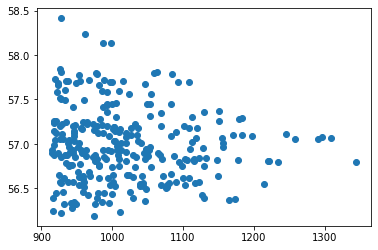

In [3]:
import matplotlib.pyplot as plt
x = dataframe.Height
y = dataframe.Latitude
plt.scatter(x, y)
plt.show()

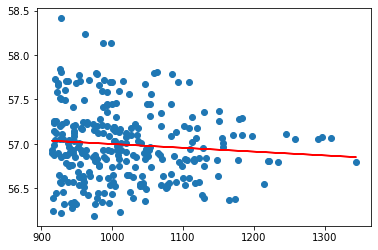

In [4]:
from scipy.stats import linregress # scipy contains a lot of statistics routines

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")  # The equation of the straight line.

(array([56. , 56.5, 57. , 57.5, 58. , 58.5, 59. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

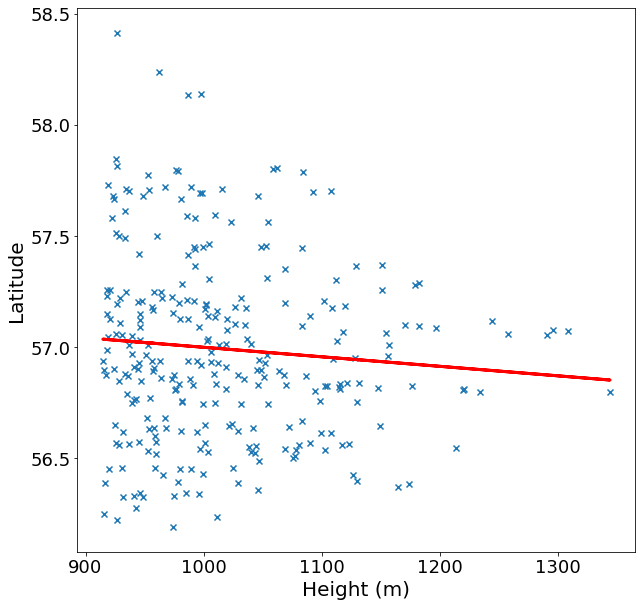

In [5]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

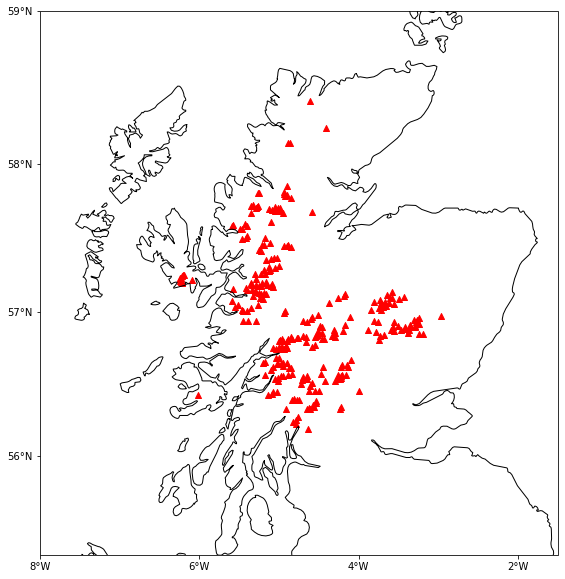

In [7]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

ax.set_yticks([56,57,58,59], crs=ccrs.PlateCarree())
ax.set_xticks([-8, -6, -4, -2], crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-8, -1.5, 55.3, 59])

plt.scatter(dataframe['Longitude'],dataframe['Latitude'], color='red', marker='^', transform=ccrs.PlateCarree())